## Hypothesis testing
**Null Hypothesis** - What is given and trivial right now  
**Alternate Hypothesis** - What we claim against Null Hypothesis    
**p-value** - Probability of getting observation given null Hypothesis  

If p-value is greater than significant value, the observation is obvious given status quo.  
If p-value is less than significant value, the observation is rare and we reject the status quo.
We will use Black Friday dataset: [blackfriday](
https://www.kaggle.com/llopesolivei/blackfriday)

### data description
We are using Black Friday data. Our goal is to check if status Quo-"Male spend more money" is correct or not,

A survey shows that the average black friday sales of male is much
higher(500$) when compared to that of female. A company which is planning for
it's black friday sales want to know if this is true and hence wanted to take data
from samples of different sizes such as 100,500,1000 from the population and
note their black friday spending details.The company wants to know if there is
really any difference in spending or it is just by chance(with significance leve
15%). Can you help the company come to a conclusion on this with the help of
data provided about different samples?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import random

In [2]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import FloatSlider,IntSlider,Combobox

In [3]:
df = pd.read_csv('/home/mayur/Downloads/PGDUOH/Python_UOH/Sem2_Notebooks/BlackFriday.csv')
df.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422


In [41]:
male_data = df[df['Gender']=='M']['Purchase'].values
female_data = df[df['Gender']=='F']['Purchase'].values
sample_size = 100
cat_sample_size = sample_size//2
alpha = 0.15
male_sample = male_data[random.sample(range(0,len(male_data)),cat_sample_size)]
female_sample = female_data[random.sample(range(0,len(female_data)),cat_sample_size)]
observed_diff = male_sample.mean()-female_sample.mean()

# Let's calculate p-value now for observation
diff_array = []
total_sample = list(male_sample)
total_sample.extend(female_sample)
total_sample = np.array(total_sample)

# Now we devide total_sample in half randomly 1000 times
for i in range(1000):
    random_sample = total_sample[random.sample(range(0,len(total_sample)),sample_size)]
    random_sample_1 = random_sample[:cat_sample_size]
    random_sample_2 = random_sample[cat_sample_size:]
    diff = random_sample_1.mean()-random_sample_2.mean()
    diff_array.append(diff)

count = len([x for x in diff_array if x > observed_diff])
pValue = count/len(diff_array)
print(pValue)


0.566


/home/mayur/.local/lib/python3.6/site-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/home/mayur/.local/lib/python3.6/site-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


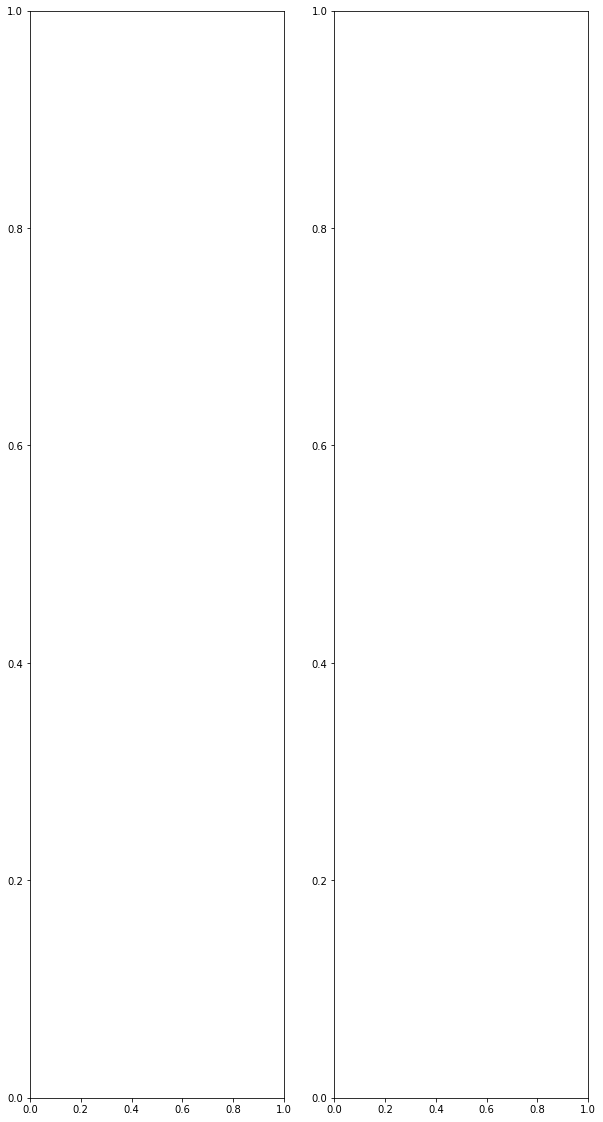

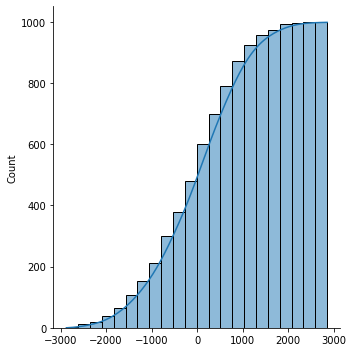

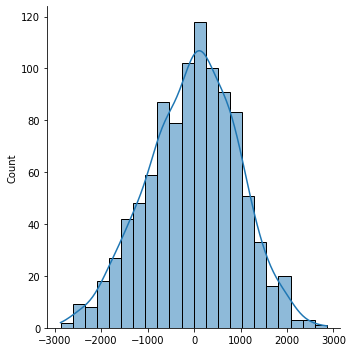

In [53]:
fig, axs = plt.subplots(1,2, figsize=(10,20))
sns.displot(diff_array, kde=True, cumulative=True, ax=(0,0))
sns.displot(diff_array, kde=True, cumulative=False, ax=(0,1))
# plt.axvline(observed_diff, linestyle="-", color='r', label="observed_diff: "+str(round(observed_diff,3)))
# plt.axhline(pValue*100, linestyle=":", color='g', label="pValue: "+str(round(pValue*100,3)))
# # plt.axhline()
# plt.title('Hypothesis testing')
# plt.legend()

In [49]:

Population_data = np.array(Population_data)

Population_mean = np.mean(Population_data)
print("Population mean: ", Population_mean)
Population_stdev = np.std(Population_data)
print("Population standard deviation: ", Population_stdev)

# We can not get value of all males and we have only 100 observations
samples = random.sample(range(0,len(Population_data)),100)
Sample_data = Population_data[samples]

NameError: name 'Population_data' is not defined

### 1. We know the Population Standard Deviation
We can estimate the Populatoin mean between x̅-2σ/√n and x̅+2σ/√n where,  
 σ is Population Standard Deviation and x̅ is Sample mean and n is the sample size.

In [10]:
def confidence_interval_1(S_size=100, Pop_stdev_isknown = True):
    '''
    Plot confidence interval in case of we know the population standard deviation.
    It takes sample size parameter.
    It uses the global variables for Population.
    It plots the displot and Confidence Interval.
    '''
    sample_size = S_size
    samples = random.sample(range(0,len(Population_data)),sample_size)
    Sample_data = Population_data[samples]
    sample_mean_x_bar = np.mean(Sample_data)

    if Pop_stdev_isknown:
        error = 2*(np.std(Population_data)/np.sqrt(sample_size))
    else:
        error = 2*(np.std(Sample_data)/np.sqrt(sample_size))
    lower_CI = sample_mean_x_bar - error
    upper_CI = sample_mean_x_bar + error

    #Just for fun we take random color everytime
    colrs = ['r','g','b','y', 'c', 'm', 'k']
    sns.displot(Population_data, color = colrs[random.randint(0,6)], kde=True)
    plt.axvline(Population_mean, linestyle="-", color='k', label="p_mean: "+str(round(Population_mean,3)))
    plt.axvline(sample_mean_x_bar, linestyle="--", color='m', label="s_mean: "+str(round(sample_mean_x_bar,3)))
    plt.axvline(lower_CI, linestyle=":", color='g', label="lower_CI: "+str(round(lower_CI,3)))
    plt.axvline(upper_CI, linestyle=":", color='g', label="upper_CI: "+str(round(upper_CI,3)))
    plt.title('Estimating mean with 95% Confidence Interval')
    plt.legend()

In [11]:
w1_with_pop_mean = interactive(confidence_interval_1,{'manual': True},S_size = IntSlider(value=100,min=10,max=1000,step=5, continuous_update=False), P_stdev_known = True)

In [12]:
display(w1_with_pop_mean)

interactive(children=(IntSlider(value=100, continuous_update=False, description='S_size', max=1000, min=10, st…

<img src="Confidence_Interval.png">